In [5]:
from google.colab import files
from zipfile import ZipFile
import os

# Upload ZIP file of dataset
#uploaded = files.upload()  # Upload gesture_dataset.zip


In [2]:
import shutil

# Move zip to default path
shutil.move("/content/drive/MyDrive/Colab Notebooks/gesture_dataset.zip", "/content/gesture_dataset.zip")


'/content/gesture_dataset.zip'

In [6]:
# Unzip it
with ZipFile("gesture_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("gesture_dataset")

# List files to confirm
os.listdir("gesture_dataset")


['None', 'Yooo', 'Hi']

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Parameters
img_height = 128
img_width = 128
batch_size = 16

In [9]:
# Load training and validation datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    "gesture_dataset",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
  )
val_ds = tf.keras.utils.image_dataset_from_directory(
    "gesture_dataset",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)
class_names = train_ds.class_names
print("Class names:", class_names)

Found 380 files belonging to 3 classes.
Using 304 files for training.
Found 380 files belonging to 3 classes.
Using 76 files for validation.
Class names: ['Hi', 'None', 'Yooo']


In [10]:
# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [11]:
# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3924 - loss: 1.0668 - val_accuracy: 0.9342 - val_loss: 0.3572
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9011 - loss: 0.3521 - val_accuracy: 0.9605 - val_loss: 0.1511
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9732 - loss: 0.0969 - val_accuracy: 0.9868 - val_loss: 0.0288
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9887 - loss: 0.0313 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 968ms/step - accuracy: 0.9887 - loss: 0.0242 - val_accuracy: 1.0000 - val_loss: 3.0294e-04
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 957ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 2.3728e-04
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 898ms/step - accuracy: 1.0000 - loss: 9.1360e-04 - val_accuracy: 1.0000 - val_loss: 7.2574e-05
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 921ms/step - accuracy: 1.0000 - loss: 9.2004e-04 - 

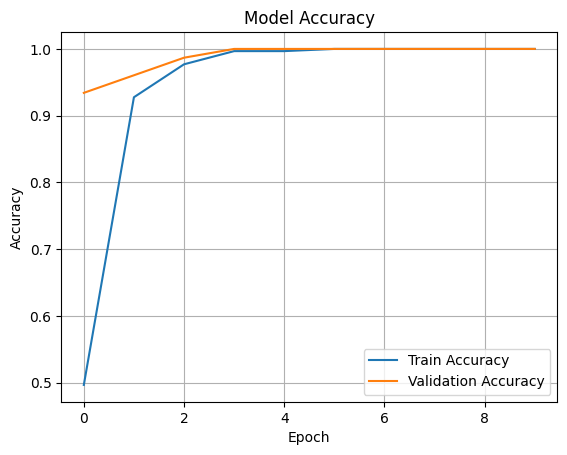

In [14]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


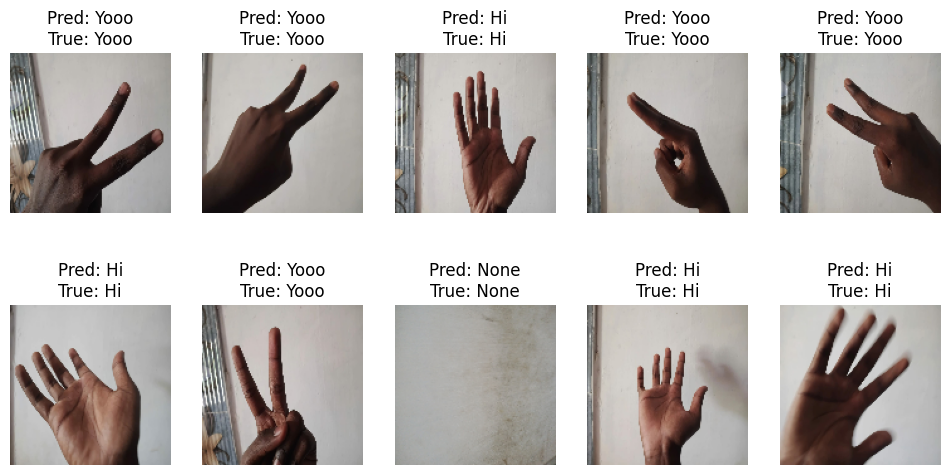

In [15]:
# Predict on validation images
for images, labels in val_ds.take(1):
    predictions = model.predict(images)
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(10):
        ax = plt.subplot(2, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Pred: {class_names[pred_classes[i]]}\nTrue: {class_names[true_classes[i]]}")
        plt.axis("off")


In [16]:
model.save("gesture_model.h5")
from google.colab import files
files.download("gesture_model.h5")  # download to your computer


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>